# Scoring new Data with sotored model

**Improvements:**
- We could have new missings in different variables, we should have an strategy for filling them all and have them saved in a file and not calculate again.
- Some columns needed for predicting could be missing.
- For categorical we can have unseen labels and we need a strategy to tackle them. For the exercise will be labelled as rare.
- In general we should have a strategy to store and read quicly in files the different information needed for performing quicly feature engineering (vars, parameters, values, mappings, etc.)

In [128]:
'''
Imports for full Data Science pipeline in Jupyter Notebook
'''
#1--- EDA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#2--- FE
import scipy.stats as stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler
#3--- FSS
from sklearn.feature_selection import SelectFromModel
#4--- Model Training
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
#5--- Model Evaluation
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, roc_auc_score
#6--- Model Interpretation
import eli5
#--- Other
import warnings
import joblib

# Settings
sns.set()
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
pd.pandas.set_option('display.max_columns', None)
warnings.filterwarnings("ignore")

Download models and Data

In [129]:
scaler = joblib.load('minmax_scaler.joblib')
logit = joblib.load('linear_regression.joblib')

In [130]:
X_test = pd.read_csv('test.csv')

In [131]:
print(X_test.shape)
X_test.head()

(1459, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


Remove Id column

In [132]:
selected_features = list(pd.read_csv('selected_features.csv').values.flatten())
print(selected_features)

['MSSubClass', 'MSZoning', 'LotFrontage', 'LotShape', 'LandContour', 'LotConfig', 'Neighborhood', 'OverallQual', 'OverallCond', 'YearRemodAdd', 'RoofStyle', 'Exterior1st', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'HalfBath', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageFinish', 'GarageCars', 'GarageArea', 'PavedDrive', 'WoodDeckSF', 'ScreenPorch', 'SaleCondition']


In [133]:
X_test.drop(columns='Id', inplace= True)
X_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


Check that we have the selected features in the dataset

In [134]:
[var for var in selected_features if var not in X_test.columns]

[]

## Missing Values

### Filling missing values from categorical variables

In [135]:
with_frequent_missing_cols = ['MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond']
with_frequent_missing_cols

['MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [136]:
with_frequent_missing_values = ['None', 'TA', 'TA', 'No', 'Unf', 'Unf', 'SBrkr', 'Attchd', 'Unf', 'TA', 'TA']

In [137]:
len(with_frequent_missing_cols), len(with_frequent_missing_values)

(11, 11)

In [138]:
with_frequent_missing = pd.DataFrame(data = with_frequent_missing_values).T
with_frequent_missing.columns = with_frequent_missing_cols
with_frequent_missing


,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,GarageType,GarageFinish,GarageQual,GarageCond
0,None,TA,TA,No,Unf,Unf,SBrkr,Attchd,Unf,TA,TA


In [139]:
np.array(with_frequent_missing_values).reshape(11,-1)

array([['None'],
       ['TA'],
       ['TA'],
       ['No'],
       ['Unf'],
       ['Unf'],
       ['SBrkr'],
       ['Attchd'],
       ['Unf'],
       ['TA'],
       ['TA']], dtype='<U6')

In [140]:
with_frequent_missing['Electrical'].values == 'SBrkr'

array([ True])

In [141]:
X_test[with_frequent_missing.columns].isnull().sum()



MasVnrType      16
BsmtQual        44
BsmtCond        45
BsmtExposure    44
BsmtFinType1    42
BsmtFinType2    42
Electrical       0
GarageType      76
GarageFinish    78
GarageQual      78
GarageCond      78
dtype: int64

In [142]:
for var in with_frequent_missing.columns:
    X_test[var] = X_test[var].fillna(with_frequent_missing[var].values[0])

In [143]:
X_test[with_frequent_missing.columns].isnull().sum()

MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
Electrical      0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64

In [144]:
with_string_missing_cols = ['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']
with_string_missing_values = ['Missing' for x in with_string_missing_cols]


In [145]:
['Missing' for x in with_string_missing_cols]

['Missing', 'Missing', 'Missing', 'Missing', 'Missing']

In [146]:
def feat_imputation_DF (cols, values):
    temp = pd.DataFrame(data = values).T
    temp.columns = cols
    return temp

In [147]:
with_string_missing = feat_imputation_DF(with_string_missing_cols,with_string_missing_values)

In [148]:
X_test[with_string_missing.columns].isnull().sum()


Alley          1352
FireplaceQu     730
PoolQC         1456
Fence          1169
MiscFeature    1408
dtype: int64

In [149]:
for var in with_string_missing.columns:
    X_test[var] = X_test[var].fillna(with_string_missing[var].values[0])

In [150]:
X_test[with_string_missing.columns].isnull().sum()


Alley          0
FireplaceQu    0
PoolQC         0
Fence          0
MiscFeature    0
dtype: int64

### Filling missing values from numerical variables

In [151]:
vars_with_na_cols = ['LotFrontage', 'MasVnrArea', 'GarageYrBlt']
vars_with_na_values = [69.87974098057354, 103.7974006116208, 1978.2959677419356]
vars_with_na = feat_imputation_DF(vars_with_na_cols, vars_with_na_values)
vars_with_na

,LotFrontage,MasVnrArea,GarageYrBlt
0,69.879741,103.797401,1978.295968


In [152]:
X_test[vars_with_na.columns].isnull().sum()


LotFrontage    227
MasVnrArea      15
GarageYrBlt     78
dtype: int64

In [153]:
for var in vars_with_na.columns:
    X_test[var] = X_test[var].fillna(vars_with_na[var].values[0])

In [154]:
X_test[vars_with_na.columns].isnull().sum()


LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [155]:
X_test.isnull().sum()[X_test.isnull().sum() >0]

MSZoning        4
Utilities       2
Exterior1st     1
Exterior2nd     1
BsmtFinSF1      1
BsmtFinSF2      1
BsmtUnfSF       1
TotalBsmtSF     1
BsmtFullBath    2
BsmtHalfBath    2
KitchenQual     1
Functional      2
GarageCars      1
GarageArea      1
SaleType        1
dtype: int64

We still have rows with missing values and we do not have a strategy to follow. For the exercise we drop these rows, since they are few.

In [156]:
cols_na = X_test.isnull().sum()[X_test.isnull().sum() > 0].index

In [157]:
X_test = X_test.dropna()

In [158]:
X_test.isnull().sum()[X_test.isnull().sum() >0]

Series([], dtype: int64)

## Temporal variables

In [159]:
def elapsed_years(df, var):
    df[var] = df['YrSold'] - df[var]
    return df

In [160]:
for var in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:
    X_test = elapsed_years(X_test, var)

In [161]:
X_test.drop(columns= 'YrSold', inplace=True)


In [162]:
X_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,Missing,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,49,49,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,Missing,Attchd,49.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,Missing,MnPrv,Missing,0,6,WD,Normal
1,20,RL,81.0,14267,Pave,Missing,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,52,52,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,Missing,Attchd,52.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,Missing,Missing,Gar2,12500,6,WD,Normal
2,60,RL,74.0,13830,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,13,12,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,13.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,Missing,MnPrv,Missing,0,3,WD,Normal
3,60,RL,78.0,9978,Pave,Missing,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,12,12,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,12.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,Missing,Missing,Missing,0,6,WD,Normal
4,120,RL,43.0,5005,Pave,Missing,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,18,18,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,Missing,Attchd,18.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,Missing,Missing,Missing,0,1,WD,Normal


## Numerical variable transformations

### Logarithmic Transformation

In [163]:
for var in ["LotFrontage", "1stFlrSF", "GrLivArea"]:
    X_test[var] = np.log(X_test[var])

### Yeo-Johnson transformation

In [164]:
param = -12.55283001172003

In [165]:
X_test['LotArea'] = stats.yeojohnson(X_test['LotArea'], lmbda=param)

In [166]:
[var for var in X_test.columns if X_test[var].isnull().sum()>0]

[]

### Binarize skewed variables

In [167]:
skewed = [
    'BsmtFinSF2', 'LowQualFinSF', 'EnclosedPorch',
    '3SsnPorch', 'ScreenPorch', 'MiscVal'
]

In [168]:
for var in skewed:
    X_test[var] = X_test[var].apply(lambda x: 0 if x == 0 else 1)

### Apply Quality mappings

In [169]:
qual_mappings = {'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4, 'Ex': 5, 'Missing': 0, 'NA': 0}

qual_vars = ['ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
             'HeatingQC', 'KitchenQual', 'FireplaceQu',
             'GarageQual', 'GarageCond',
            ]

for var in qual_vars:
    X_test[var] = X_test[var].map(qual_mappings)

In [170]:
exposure_mappings = {'No': 1, 'Mn': 2, 'Av': 3, 'Gd': 4}

var = 'BsmtExposure'

X_test[var] = X_test[var].map(exposure_mappings)

In [171]:
finish_mappings = {'Missing': 0, 'NA': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 'BLQ': 4, 'ALQ': 5, 'GLQ': 6}

finish_vars = ['BsmtFinType1', 'BsmtFinType2']

for var in finish_vars:
    X_test[var] = X_test[var].map(finish_mappings)

In [172]:
garage_mappings = {'Missing': 0, 'NA': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3}

var = 'GarageFinish'

X_test[var] = X_test[var].map(garage_mappings)

In [173]:
fence_mappings = {'Missing': 0, 'NA': 0, 'MnWw': 1, 'GdWo': 2, 'MnPrv': 3, 'GdPrv': 4}

var = 'Fence'

X_test[var] = X_test[var].map(fence_mappings)

In [174]:
[var for var in X_test.columns if X_test[var].isnull().sum() > 0]

[]

### Removing rare labels
For this case if we detect a new label will be labelled as rare for the ones that had this label since we should work with the frequent lables for each variable.

In [176]:
frequent_labels = pd.DataFrame(['RL', 'RM', 'FV', 'RH'], columns=['MSZoning'])

In [182]:
frequent_labels_dict = {
    'MSZoning':['RL', 'RM', 'FV', 'RH'],
    'Street': ['Pave'],
    'Alley': ['Missing', 'Grvl', 'Pave'],
    'LotShape':['Reg', 'IR1', 'IR2'],
    'LandContour':['Lvl', 'Bnk', 'HLS', 'Low'],
    'Utilities':['AllPub'],
    'LotConfig':['Inside', 'Corner', 'CulDSac', 'FR2'],
    'LandSlope':['Gtl', 'Mod'],
    'Neighborhood':['NAmes', 'CollgCr', 'OldTown', 'Edwards', 'Somerst', 'NridgHt',
       'Gilbert', 'Sawyer', 'NWAmes', 'BrkSide', 'SawyerW', 'Crawfor',
       'Mitchel', 'Timber', 'NoRidge', 'IDOTRR', 'ClearCr', 'SWISU', 'StoneBr',
       'Blmngtn', 'MeadowV', 'BrDale'],
    'Condition1':['Norm', 'Feedr', 'Artery', 'RRAn', 'PosN'],
    'Condition2':['Norm'],
    'BldgType':['1Fam', 'TwnhsE', 'Duplex', 'Twnhs', '2fmCon'],
    'HouseStyle':['1Story', '2Story', '1.5Fin', 'SLvl', 'SFoyer'],
    'RoofStyle':['Gable', 'Hip'],
    'RoofMatl':['CompShg'],
    'Exterior1st':['VinylSd', 'HdBoard', 'Wd Sdng', 'MetalSd', 'Plywood', 'CemntBd',
       'BrkFace', 'Stucco', 'WdShing', 'AsbShng'],
    'Exterior2nd':['VinylSd', 'HdBoard', 'Wd Sdng', 'MetalSd', 'Plywood', 'CmentBd',
       'Wd Shng', 'BrkFace', 'Stucco', 'AsbShng'],
    'MasVnrType':['None', 'BrkFace', 'Stone'],
    'Foundation':['PConc', 'CBlock', 'BrkTil', 'Slab'],
    'Heating':['GasA', 'GasW'],
    'CentralAir':['Y', 'N'],
    'Electrical':['SBrkr', 'FuseA', 'FuseF'],
    'Functional':['Typ', 'Min2', 'Min1', 'Mod'],
    'GarageType':['Attchd', 'Detchd', 'BuiltIn', 'Basment'],
    'PavedDrive':['Y', 'N', 'P'],
    'PoolQC':['Missing'],
    'MiscFeature':['Missing', 'Shed'],
    'SaleType':['WD', 'New', 'COD'],
    'SaleCondition':['Normal', 'Partial', 'Abnorml', 'Family'],
    'MSSubClass':[20, 60, 50, 120, 30, 160, 70, 80, 90, 190, 75, 85]
}

In [183]:
frequent_labels_dict['Functional']

['Typ', 'Min2', 'Min1', 'Mod']

In [193]:
for var in list(frequent_labels_dict.keys()):
    X_test[var] = X_test[var].apply(lambda x: x if x in frequent_labels_dict[var] else 'Rare')

### Encoding categorical variables

In [197]:
encoding_dic = {
    'MSZoning': {'Rare': 0, 'RM': 1, 'RH': 2, 'RL': 3, 'FV': 4},
    'Street': {'Rare': 0, 'Pave': 1},
    'Alley': {'Grvl': 0, 'Pave': 1, 'Missing': 2},
    'LotShape': {'Reg': 0, 'IR1': 1, 'Rare': 2, 'IR2': 3},
    'LandContour': {'Bnk': 0, 'Lvl': 1, 'Low': 2, 'HLS': 3},
    'Utilities': {'Rare': 0, 'AllPub': 1},
    'LotConfig': {'Inside': 0, 'FR2': 1, 'Corner': 2, 'Rare': 3, 'CulDSac': 4},
    'LandSlope': {'Gtl': 0, 'Mod': 1, 'Rare': 2},
    'Neighborhood': {'IDOTRR': 0, 'MeadowV': 1, 'BrDale': 2, 'Edwards': 3, 'BrkSide': 4, 'OldTown': 5, 'Sawyer': 6, 'SWISU': 7, 'NAmes': 8, 'Mitchel': 9, 'SawyerW': 10, 'Rare': 11, 'NWAmes': 12, 'Gilbert': 13, 'Blmngtn': 14, 'CollgCr': 15, 'Crawfor': 16, 'ClearCr': 17, 'Somerst': 18, 'Timber': 19, 'StoneBr': 20, 'NridgHt': 21, 'NoRidge': 22},
    'Condition1': {'Artery': 0, 'Feedr': 1, 'Norm': 2, 'RRAn': 3, 'Rare': 4, 'PosN': 5},
    'Condition2': {'Rare': 0, 'Norm': 1},
    'BldgType': {'2fmCon': 0, 'Duplex': 1, 'Twnhs': 2, '1Fam': 3, 'TwnhsE': 4},
    'HouseStyle': {'SFoyer': 0, '1.5Fin': 1, 'Rare': 2, '1Story': 3, 'SLvl': 4, '2Story': 5},
    'RoofStyle': {'Gable': 0, 'Rare': 1, 'Hip': 2},
    'RoofMatl': {'CompShg': 0, 'Rare': 1},
    'Exterior1st': {'AsbShng': 0, 'Wd Sdng': 1, 'WdShing': 2, 'MetalSd': 3, 'Stucco': 4, 'Rare': 5, 'HdBoard': 6, 'Plywood': 7, 'BrkFace': 8, 'CemntBd': 9, 'VinylSd': 10},
    'Exterior2nd': {'AsbShng': 0, 'Wd Sdng': 1, 'MetalSd': 2, 'Wd Shng': 3, 'Stucco': 4, 'Rare': 5, 'HdBoard': 6, 'Plywood': 7, 'BrkFace': 8, 'CmentBd': 9, 'VinylSd': 10},
    'MasVnrType': {'Rare': 0, 'None': 1, 'BrkFace': 2, 'Stone': 3},
    'Foundation': {'Slab': 0, 'BrkTil': 1, 'CBlock': 2, 'Rare': 3, 'PConc': 4},
    'Heating': {'Rare': 0, 'GasW': 1, 'GasA': 2},
    'CentralAir': {'N': 0, 'Y': 1},
    'Electrical': {'Rare': 0, 'FuseF': 1, 'FuseA': 2, 'SBrkr': 3},
    'Functional': {'Rare': 0, 'Min2': 1, 'Mod': 2, 'Min1': 3, 'Typ': 4},
    'GarageType': {'Rare': 0, 'Detchd': 1, 'Basment': 2, 'Attchd': 3, 'BuiltIn': 4},
    'PavedDrive': {'N': 0, 'P': 1, 'Y': 2},
    'PoolQC': {'Missing': 0, 'Rare': 1},
    'MiscFeature': {'Rare': 0, 'Shed': 1, 'Missing': 2},
    'SaleType': {'COD': 0, 'Rare': 1, 'WD': 2, 'New': 3},
    'SaleCondition': {'Rare': 0, 'Abnorml': 1, 'Family': 2, 'Normal': 3, 'Partial': 4},
    'MSSubClass': {30: 0, 'Rare': 1, 190: 2, 90: 3, 160: 4, 50: 5, 85: 6, 70: 7, 80: 8, 20: 9, 75: 10, 120: 11, 60: 12}
}



In [198]:
for var in list(encoding_dic.keys()):
    X_test[var] = X_test[var].map(encoding_dic[var])


In [200]:
[var for var in X_test.columns if X_test[var].isnull().sum() > 0]

[]

## Feature scaling

In [201]:
X_test = pd.DataFrame(data = scaler.transform(X_test), columns= X_test.columns)

In [202]:
X_test.to_csv('xtest_assignment.csv', index=False)


## Model Prediction

In [204]:
features = pd.read_csv('selected_features.csv')
features = list(features.values.flatten())

In [205]:
X_test = X_test[features]
X_test.shape

(1447, 36)

In [206]:
pred_test = logit.predict(X_test)

In [208]:
pred_test

array([11.63887553, 11.9504461 , 12.07895772, ..., 11.95140313,
       11.69483403, 12.25440615])

<AxesSubplot:ylabel='Count'>

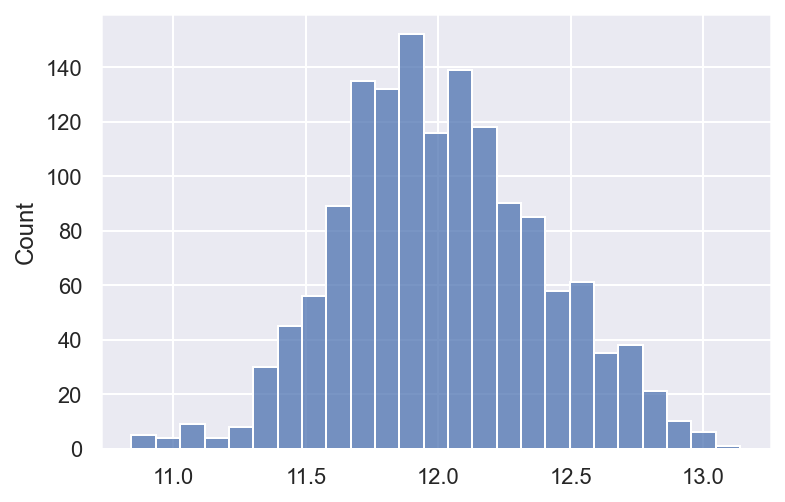

In [210]:
sns.histplot(pred_test)